# Tidy Tuesday: Lake Hornborgasjön Cranes
**September 30, 2025**

* Has the crane population at Lake Hornborgasjön grown over the past 30 years?
* If you wanted to see thousands of cranes, when is the best time of year to visit?
* Is it possible to predict the arrival of the cranes from weather patterns?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cranes = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-30/cranes.csv')
cranes

,date,observations,comment,weather_disruption
0,2024-10-03,408.0,Last count of season,False
1,2024-09-30,14940.0,NaN,False
2,2024-09-26,NaN,Canceled/No count,True
3,2024-09-23,18450.0,NaN,False
4,2024-09-19,14900.0,NaN,False
...,...,...,...,...
1543,1994-03-28,NaN,Canceled/No count,False
1544,1994-03-27,NaN,Canceled/No count,False
1545,1994-03-26,NaN,Canceled/No count,False
1546,1994-03-25,200.0,NaN,False


## Exploring data

What were the reasons for comments?

In [3]:
cranes.comment.value_counts()

comment
Canceled/No count        146
Uncertain count           22
Severe interference        7
Last count of season       6
Bad weather                4
Record observation         3
First count of season      2
Name: count, dtype: int64

For weather disruptions, how many counts were cancelled?

In [4]:
cranes_wd = cranes[cranes['weather_disruption']==True] # Mask of data with weather disruption
cranes_wd['comment'].value_counts()

comment
Canceled/No count    36
Bad weather           4
Uncertain count       1
Name: count, dtype: int64

The heron population was not counted 36 times.

## Answering goals
### Has the crane population at Lake Hornborgasjön grown over the past 30 years?

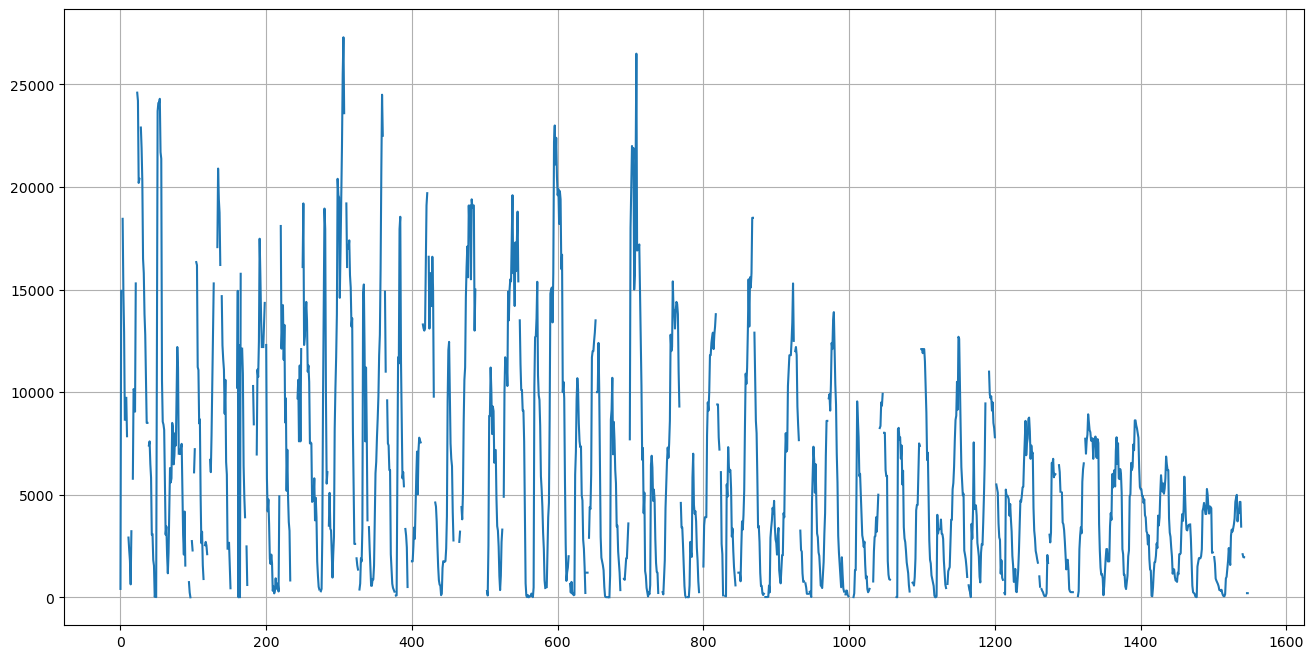

In [5]:
plt.figure(figsize=(16,8))
plt.plot(cranes.observations)
plt.grid()

A quick plot shows that the heron population decreasing over time. There is a pattern of ups and downs which may correlate with seasonal migration patterns.

### If you wanted to see thousands of cranes, when is the best time of year to visit?

In [6]:
cranes1000 = cranes[cranes['observations'] > 1000] # Mask data for observations over 1000
cranes1000[['year', 'month', 'day']] = cranes1000['date'].str.split('-', expand=True)
cranes1000

C:\Users\njlee\AppData\Local\Temp\ipykernel_29140\3044919707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cranes1000[['year', 'month', 'day']] = cranes1000['date'].str.split('-', expand=True)
C:\Users\njlee\AppData\Local\Temp\ipykernel_29140\3044919707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cranes1000[['year', 'month', 'day']] = cranes1000['date'].str.split('-', expand=True)
C:\Users\njlee\AppData\Local\Temp\ipykernel_29140\3044919707.py:2: SettingWithCopyWarning: 
A value is trying to b

,date,observations,comment,weather_disruption,year,month,day
1,2024-09-30,14940.0,NaN,False,2024,09,30
3,2024-09-23,18450.0,NaN,False,2024,09,23
4,2024-09-19,14900.0,NaN,False,2024,09,19
5,2024-09-16,12900.0,NaN,False,2024,09,16
6,2024-09-12,8660.0,NaN,False,2024,09,12
...,...,...,...,...,...,...,...
1537,1994-04-03,4650.0,NaN,False,1994,04,03
1538,1994-04-02,3444.0,NaN,False,1994,04,02
1540,1994-03-31,2100.0,NaN,False,1994,03,31
1541,1994-03-30,1955.0,NaN,False,1994,03,30


In [7]:
cranes1000.month.value_counts()

month
04    566
03    263
09    183
10     59
08     57
Name: count, dtype: int64

March and April have the highest number of reported counts of 1000 or more herons, followed by September. August and October - which are the months surrounding September - have less counts.

### Is it possible to predict the arrival of the cranes from weather patterns?

I will answer this using Power BI.